100%|██████████| 100/100 [00:26<00:00,  3.77it/s]


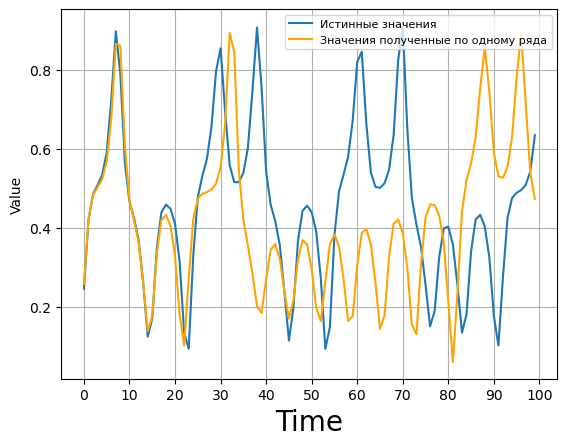

0.059941894341620644


100%|██████████| 100/100 [02:08<00:00,  1.28s/it]


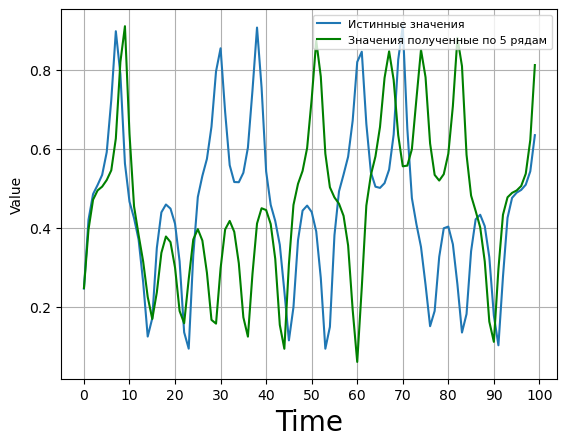

0.07735696306625033


In [1]:
import matplotlib.pyplot as plt

from Predictions import *
import pandas as pd
import numpy as np


from sklearn.metrics import mean_squared_error
epsilon = 0.004
test_size_constant = 100
val_size_constant = 200
template_length_constant = 5
template_spread_constant = 5
dt = 0.01
ts_size = 100000
divisor = int(0.1 / dt)

r_values = [28]
list_ts = []
for i, r in enumerate(r_values):
    ts = TimeSeries("Lorentz", size=ts_size, r=r, dt=dt, divisor=divisor)
    list_ts.append(ts)
tsproc = TSProcessor(list_ts, template_length=template_length_constant, max_template_spread=template_spread_constant,
                     train_size=len(list_ts[0].values) - val_size_constant - test_size_constant,
                     val_size=val_size_constant, test_size=test_size_constant)

fort, values = tsproc.pull(epsilon)
real_values = list_ts[0].values[-test_size_constant:]
pred_values1 = values[-test_size_constant:]
plt.grid()
plt.plot(real_values, label='Истинные значения')
plt.plot(range(pred_values1.size), pred_values1, c='orange', label='Значения полученные по одному ряда')
# plt.plot(range(pred_values2.size), pred_values2, c='green', label='Значения полученные по 5 рядам')

plt.xlabel('Шаги', fontsize=20)
plt.xticks(range(0, test_size_constant + 10, 10))
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend(fontsize=8)
plt.savefig('prediction_experiment3.png', dpi=300, bbox_inches='tight')
plt.show()
r_values = [28, 24.74, 30, 40, 50]
list_ts = []
print(mean_squared_error(real_values, pred_values1))

for i, r in enumerate(r_values):
    ts = TimeSeries("Lorentz", size=ts_size, r=r, dt=dt, divisor=divisor)
    list_ts.append(ts)
tsproc = TSProcessor(list_ts, template_length=template_length_constant, max_template_spread=template_spread_constant,
                     train_size=len(list_ts[0].values) - val_size_constant - test_size_constant,
                     val_size=val_size_constant, test_size=test_size_constant)

fort, values = tsproc.pull(epsilon)
real_values = list_ts[0].values[-test_size_constant:]
pred_values2 = values[-test_size_constant:]
plt.grid()
plt.plot(real_values, label='Истинные значения')
# plt.plot(range(pred_values1.size), pred_values1, c='orange', label='Значения полученные по одному ряда')
plt.plot(range(pred_values2.size), pred_values2, c='green', label='Значения полученные по 5 рядам')

plt.xlabel('Шаги', fontsize=20)
plt.xticks(range(0, test_size_constant + 10, 10))
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend(fontsize=8)
plt.savefig('prediction_experiment3.png', dpi=300, bbox_inches='tight')
plt.show()
print(mean_squared_error(real_values, pred_values2))


100%|██████████| 100/100 [00:26<00:00,  3.71it/s]


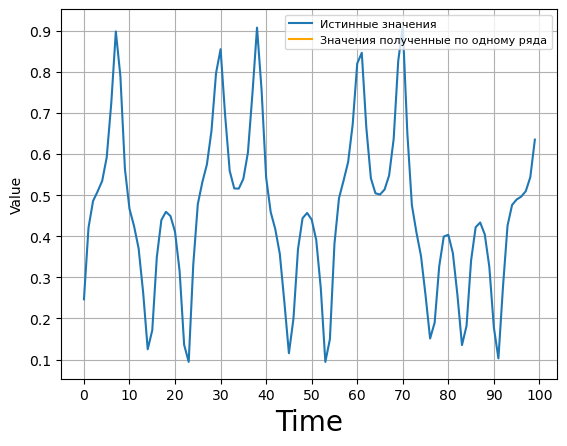

100%|██████████| 100/100 [02:06<00:00,  1.26s/it]


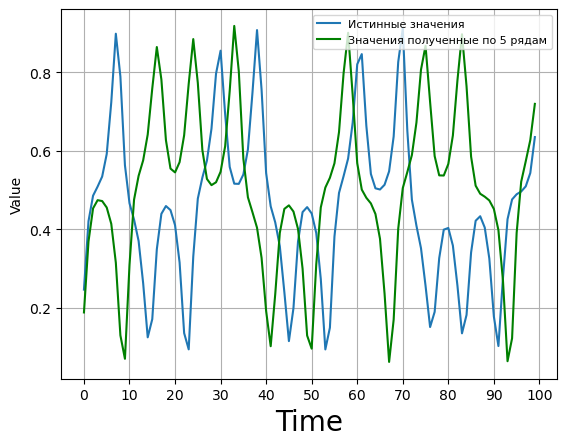

0.10083091971035035


In [2]:
import matplotlib.pyplot as plt

from Predictions import *
import pandas as pd
import numpy as np



epsilon = 0.002
test_size_constant = 100
val_size_constant = 200
template_length_constant = 5
template_spread_constant = 5
dt = 0.01
ts_size = 100000
divisor = int(0.1 / dt)

r_values = [28]
list_ts = []
for i, r in enumerate(r_values):
    ts = TimeSeries("Lorentz", size=ts_size, r=r, dt=dt, divisor=divisor)
    list_ts.append(ts)
tsproc = TSProcessor(list_ts, template_length=template_length_constant, max_template_spread=template_spread_constant,
                     train_size=len(list_ts[0].values) - val_size_constant - test_size_constant,
                     val_size=val_size_constant, test_size=test_size_constant)

fort, values = tsproc.pull(epsilon)
real_values = list_ts[0].values[-test_size_constant:]
pred_values1 = values[-test_size_constant:]
plt.grid()
plt.plot(real_values, label='Истинные значения')
plt.plot(range(pred_values1.size), pred_values1, c='orange', label='Значения полученные по одному ряда')
# plt.plot(range(pred_values2.size), pred_values2, c='green', label='Значения полученные по 5 рядам')

plt.xlabel('Шаги', fontsize=20)
plt.xticks(range(0, test_size_constant + 10, 10))
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend(fontsize=8)
plt.savefig('prediction_experiment3.png', dpi=300, bbox_inches='tight')
plt.show()
r_values = [28, 24.74, 30, 100, 150]
list_ts = []

for i, r in enumerate(r_values):
    ts = TimeSeries("Lorentz", size=ts_size, r=r, dt=dt, divisor=divisor)
    list_ts.append(ts)
tsproc = TSProcessor(list_ts, template_length=template_length_constant, max_template_spread=template_spread_constant,
                     train_size=len(list_ts[0].values) - val_size_constant - test_size_constant,
                     val_size=val_size_constant, test_size=test_size_constant)

fort, values = tsproc.pull(epsilon)
real_values = list_ts[0].values[-test_size_constant:]
pred_values2 = values[-test_size_constant:]
plt.grid()
plt.plot(real_values, label='Истинные значения')
# plt.plot(range(pred_values1.size), pred_values1, c='orange', label='Значения полученные по одному ряда')
plt.plot(range(pred_values2.size), pred_values2, c='green', label='Значения полученные по 5 рядам')

plt.xlabel('Шаги', fontsize=20)
plt.xticks(range(0, test_size_constant + 10, 10))
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend(fontsize=8)
plt.savefig('prediction_experiment.png', dpi=300, bbox_inches='tight')
plt.show()
print(mean_squared_error(real_values, pred_values2))


100%|██████████| 100/100 [02:03<00:00,  1.24s/it]


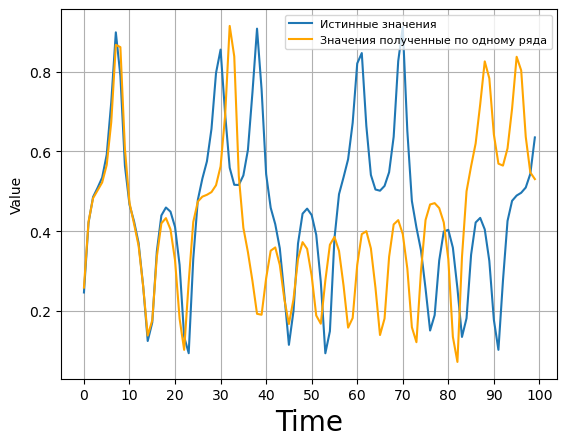

100%|██████████| 100/100 [04:18<00:00,  2.58s/it]


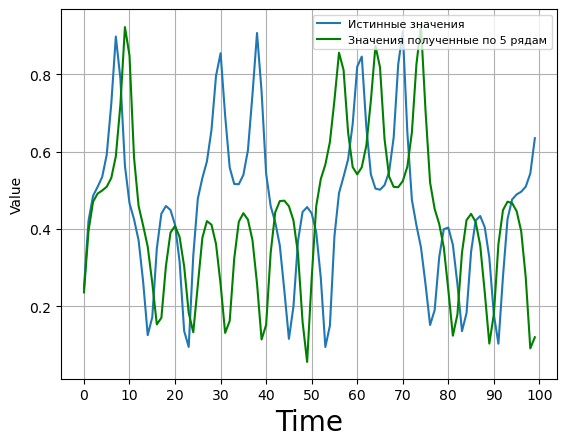

In [1]:
import matplotlib.pyplot as plt

from Predictions import *
import pandas as pd
import numpy as np

epsilon = 0.003
test_size_constant = 100
val_size_constant = 200
template_length_constant = 5
template_spread_constant = 5
dt = 0.01
ts_size = 100000
divisor = int(0.1 / dt)

r_values = [28]
list_ts = []
for i, r in enumerate(r_values):
    ts = TimeSeries("Lorentz", size=ts_size, r=r, dt=dt, divisor=divisor)
    list_ts.append(ts)
tsproc = TSProcessor(list_ts, template_length=template_length_constant, max_template_spread=template_spread_constant,
                     train_size=len(list_ts[0].values) - val_size_constant - test_size_constant,
                     val_size=val_size_constant, test_size=test_size_constant)

fort, values = tsproc.pull(epsilon)
real_values = list_ts[0].values[-test_size_constant:]
pred_values1 = values[-test_size_constant:]
plt.grid()
plt.plot(real_values, label='Истинные значения')
plt.plot(range(pred_values1.size), pred_values1, c='orange', label='Значения полученные по одному ряда')
# plt.plot(range(pred_values2.size), pred_values2, c='green', label='Значения полученные по 5 рядам')

plt.xlabel('Шаги', fontsize=20)
plt.xticks(range(0, test_size_constant + 10, 10))
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend(fontsize=8)
plt.savefig('prediction_experiment3.png', dpi=300, bbox_inches='tight')
plt.show()
from sklearn.metrics import mean_squared_error
print(mean_squared_error(real_values, pred_values1))
r_values = [28, 24.74, 30, 100, 150]
list_ts = []

for i, r in enumerate(r_values):
    ts = TimeSeries("Lorentz", size=ts_size, r=r, dt=dt, divisor=divisor)
    list_ts.append(ts)
tsproc = TSProcessor(list_ts, template_length=template_length_constant, max_template_spread=template_spread_constant,
                     train_size=len(list_ts[0].values) - val_size_constant - test_size_constant,
                     val_size=val_size_constant, test_size=test_size_constant)

fort, values = tsproc.pull(epsilon)
real_values = list_ts[0].values[-test_size_constant:]
pred_values2 = values[-test_size_constant:]
plt.grid()
plt.plot(real_values, label='Истинные значения')
# plt.plot(range(pred_values1.size), pred_values1, c='orange', label='Значения полученные по одному ряда')
plt.plot(range(pred_values2.size), pred_values2, c='green', label='Значения полученные по 5 рядам')

plt.xlabel('Шаги', fontsize=20)
plt.xticks(range(0, test_size_constant + 10, 10))
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend(fontsize=8)
plt.savefig('prediction_experiment.png', dpi=300, bbox_inches='tight')
plt.show()

